In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [ ]:
iris_data = pd.read_csv("Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


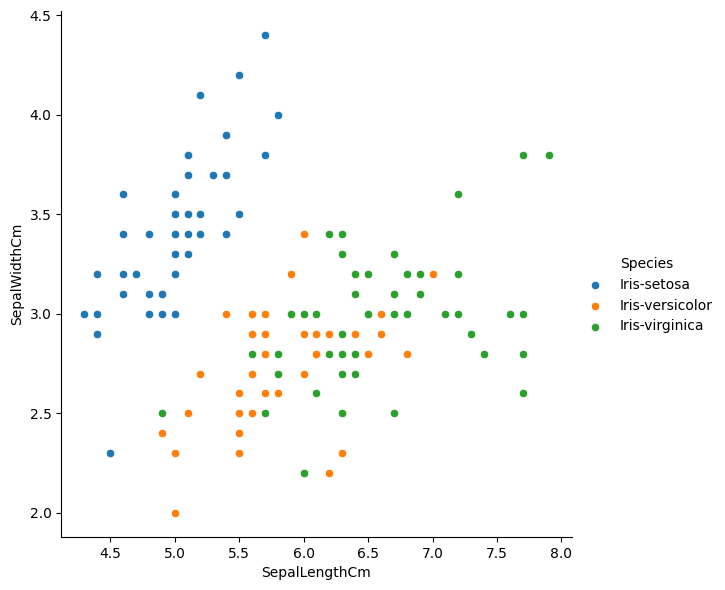

In [ ]:
sns.FacetGrid(iris_data,hue="Species",height=6).map(sns.scatterplot,"SepalLengthCm","SepalWidthCm").add_legend()
plt.show()

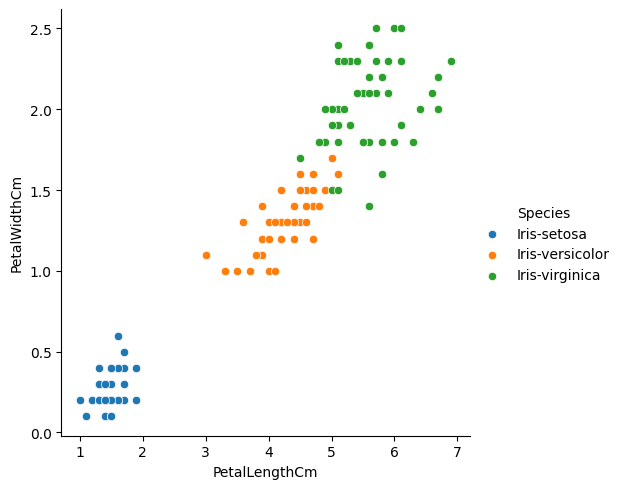

In [ ]:
sns.FacetGrid(iris_data,hue="Species",height=5).map(sns.scatterplot,"PetalLengthCm","PetalWidthCm").add_legend()
plt.show()

In [ ]:
iris_data.isnull().values.any()

False

In [ ]:
iris_data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
iris_data['Species']= LabelEncoder().fit_transform(iris_data["Species"])

In [ ]:
iris_data[iris_data.Species==0].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
iris_data[iris_data.Species==1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,1
51,52,6.4,3.2,4.5,1.5,1
52,53,6.9,3.1,4.9,1.5,1
53,54,5.5,2.3,4.0,1.3,1
54,55,6.5,2.8,4.6,1.5,1


In [ ]:
iris_data[iris_data.Species==2].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,2
101,102,5.8,2.7,5.1,1.9,2
102,103,7.1,3.0,5.9,2.1,2
103,104,6.3,2.9,5.6,1.8,2
104,105,6.5,3.0,5.8,2.2,2


In [ ]:
setosa = iris_data[:50]
versicolor = iris_data[50:100]
virginica = iris_data[100:]

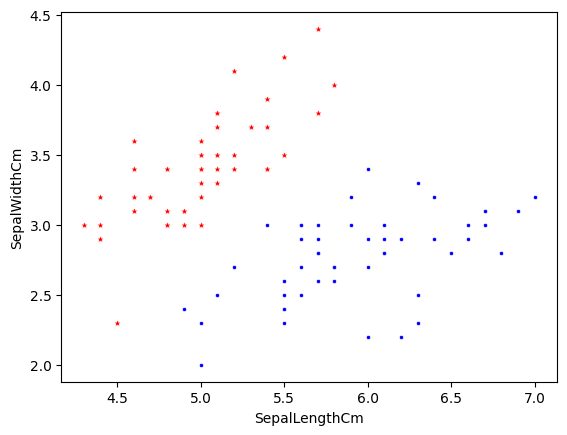

In [ ]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=setosa,color="red",marker="*")
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=versicolor,color="blue", marker=".")

plt.show()

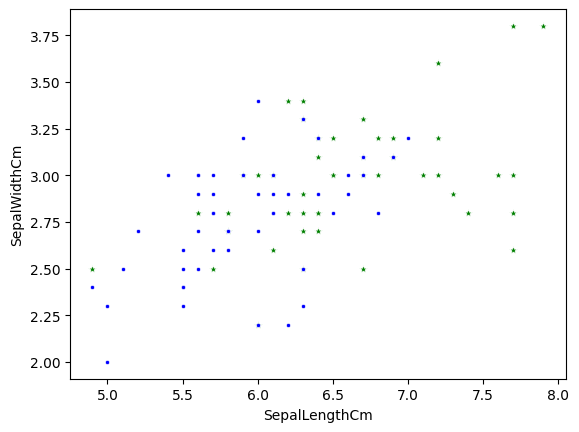

In [ ]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=virginica,color="green",marker="*")
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=versicolor,color="blue", marker=".")

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


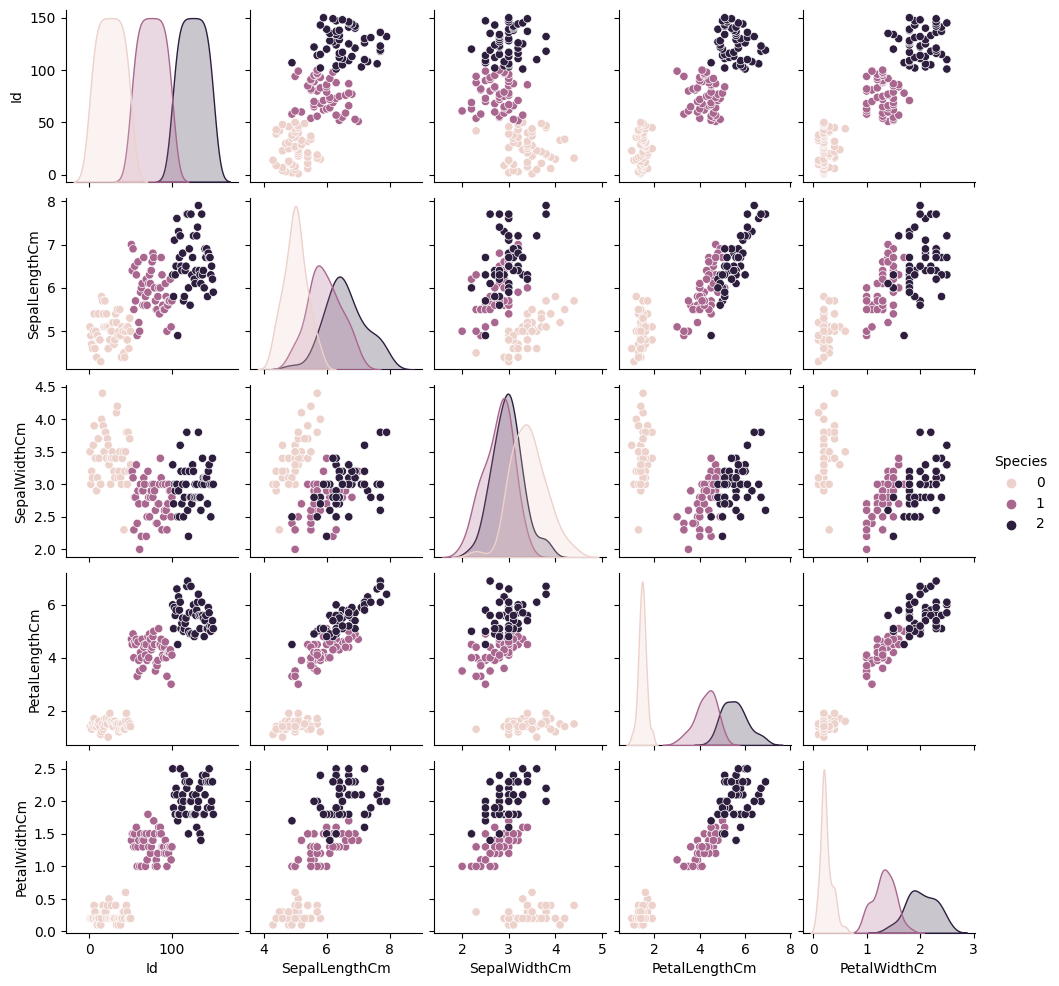

In [ ]:
sns.pairplot(iris_data,hue='Species',size=2)
plt.show()

In [ ]:
x= iris_data.drop(["Species"],axis=1)
y=iris_data["Species"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)


In [ ]:
len(X_train)

105

In [ ]:
len(X_test)

45

In [ ]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
knn.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
knn.score(X_test,y_test)

1.0

In [ ]:
y_pred = knn.predict(X_test)
cn= confusion_matrix(y_test,y_pred)
print(cn)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


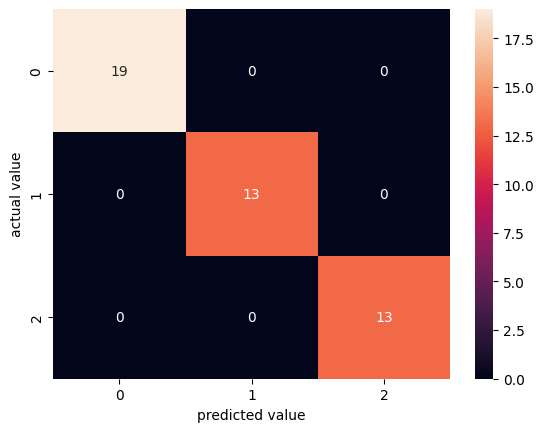

In [ ]:
sns.heatmap(cn,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lgr.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
lgr.score(X_test,y_test)

1.0

In [ ]:
y1_pred=lgr.predict(X_test)

In [ ]:
cnn1=confusion_matrix(y_test,y1_pred)
cnn1

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

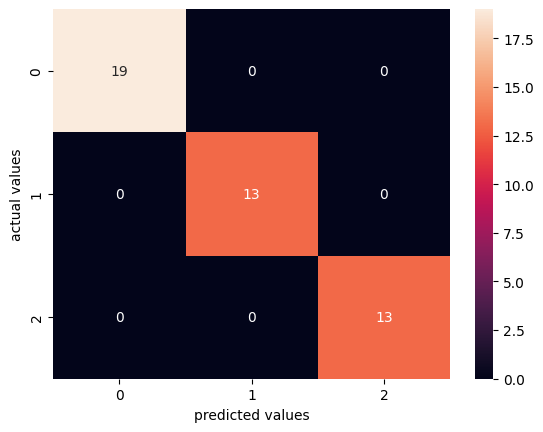

In [ ]:
sns.heatmap(cnn1,annot=True)
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show()

In [ ]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
tree_model=DecisionTreeClassifier(criterion="gini",max_depth=2)

In [ ]:
tree_model.fit(X_train,y_train)
tree_model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
tree_model.score(X_test,y_test)

1.0

In [ ]:
y_pred2=tree_model.predict(X_test)

In [ ]:
cm2=confusion_matrix(y_test,y_pred2)
cm2

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[Text(0.6, 0.8333333333333334, 'x[0] <= 100.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4, 0.5, 'x[4] <= 0.8\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

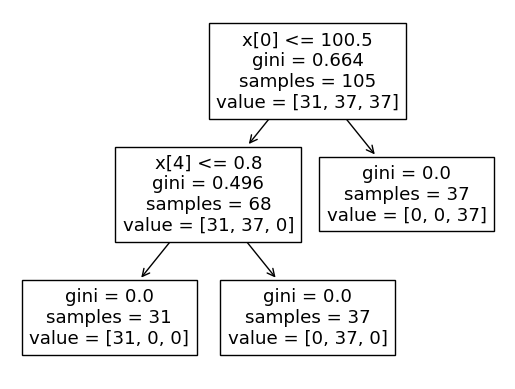

In [ ]:
vis_model=plot_tree(tree_model)
vis_model